In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Read data
data = pd.read_csv('../input/datasets-for-churn-telecom/cell2celltrain.csv')

# Remove nan data
# data=data.dropna()
# data.isnull().sum()

# # Infer data types
# data = data.infer_objects()

# # Replace categorical to numerical labels
# data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})
# columns = data.columns

In [ ]:
data.shape

In [ ]:
data.Churn.value_counts()

In [ ]:
data.Churn.value_counts()/data.shape[0]

In [ ]:
data.isnull().sum()

In [ ]:
missing = list()
for x in data.columns:
    if data[x].isnull().any():
        print(x, data[x].isnull().sum())
        missing.append(x)

In [ ]:
data.DirectorAssistedCalls.describe()

In [ ]:
plt.figure(figsize=(7,7))
plt.grid(True)
sns.distplot(data.DirectorAssistedCalls.fillna(0))
plt.xlim(right=30)

In [ ]:
data.Churn[data.DirectorAssistedCalls != 0].value_counts()/data.shape[0]

In [ ]:
data.AgeHH1.describe()

In [ ]:
data.AgeHH2.describe()

In [ ]:
data.Churn[(data.AgeHH1.fillna(0) == 0)&(data.AgeHH2.fillna(0) == 0)].value_counts()

In [2]:
data = data.fillna(0)

In [3]:
categorical_data = data.select_dtypes(include=['object', 'category'])
categoricals = categorical_data.columns

In [4]:
data[categoricals].nunique()

Churn                        2
ServiceArea                748
ChildrenInHH                 2
HandsetRefurbished           2
HandsetWebCapable            2
TruckOwner                   2
RVOwner                      2
Homeownership                2
BuysViaMailOrder             2
RespondsToMailOffers         2
OptOutMailings               2
NonUSTravel                  2
OwnsComputer                 2
HasCreditCard                2
NewCellphoneUser             2
NotNewCellphoneUser          2
OwnsMotorcycle               2
HandsetPrice                16
MadeCallToRetentionTeam      2
CreditRating                 7
PrizmCode                    4
Occupation                   8
MaritalStatus                3
dtype: int64

In [ ]:
def plot_val_counts(df, col=''):
    plt.figure(figsize=(5,5))
    plt.grid(True)
    plt.bar(df[col][df.Churn=='Yes'].value_counts().index, 
            df[col][df.Churn=='Yes'].value_counts().values)
    plt.title(f'{col}')
    plt.xticks(rotation=-90)

In [ ]:
plot_val_counts(data, col='HandsetPrice')
data['HandsetPrice'].value_counts()

In [ ]:
def plot_distro(df, col = '', y_limit=None, x_limit_r=None, x_limit_l = None):
    plt.figure(figsize=(10,10))
    plt.grid(True)
    sns.distplot(df[col][df.Churn == 'Yes'])
    sns.distplot(df[col][df.Churn == 'No'])
    plt.legend(['churn_flag_yes', 'churn_flag_no'])
    if y_limit:
        plt.ylim(top=y_limit)
    if x_limit_r:
        plt.xlim(right=x_limit_r)
    if x_limit_l:
        plt.xlim(left=x_limit_l)

In [ ]:
plot_distro(data, col='PercChangeMinutes', x_limit_r=1200, x_limit_l=-1200)

In [5]:
data.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [ ]:
# Cleanning and exploring

# handling categorical values

# Assign a score to the each service-area based on the number of churns that accured in that area
# grouped = data.groupby('ServiceArea')
# data['NumberOfChurn'] = grouped['Churn'].transform('count')
# maxchurn = data['NumberOfChurn'].max()
# data['service_area_scores'] = data['NumberOfChurn']/maxchurn
# print(data.shape)


In [6]:
categorical_data.head()

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes


In [7]:
# Remove churn label from data and store it into xtrain variable
xtrain = data.drop(['Churn', 'CustomerID', ], axis=1) #'ServiceArea'
ytrain = data['Churn']

categoricals = categorical_data.drop(['Churn', ], axis=1).columns #'ServiceArea'

pd.options.display.max_columns = None
# pd.options.display.max_rows = None

one_hot_df = pd.get_dummies(xtrain[categoricals])
numerical_df = xtrain.drop(categoricals, axis=1)

In [8]:
# Normalize data
numerical_col = numerical_df.columns
normalized_numerical = StandardScaler().fit_transform(numerical_df)
normalized_numerical_df = pd.DataFrame(data=normalized_numerical, columns = numerical_col)
normalized_numerical_df.isnull().sum()
# normalized_xtrain['ServiceArea'].where(normalized_xtrain['ServiceArea']>0).head(20)

MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
RetentionCalls               0
RetentionOffersAccepted      0
ReferralsMadeBySubscriber    0
IncomeGr

In [9]:
xtrain_final = pd.concat([normalized_numerical_df, one_hot_df], axis=1)
xtrain_final.head()
xtrain_final.shape

(51047, 852)

In [10]:
# PCA Projection to 2D
pca = PCA(n_components=.90)
principalComponents = pca.fit_transform(xtrain_final.values)
print(principalComponents.shape)
PCDF = pd.DataFrame(data = principalComponents)
PCDF.head()

(51047, 36)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-1.953397,1.590653,3.598276,-2.067164,1.477430,-0.842513,1.011409,-1.491531,-0.209148,-0.113227,-0.323498,-0.171255,-1.018437,0.485527,0.075374,-0.162122,-0.242232,0.035814,-0.009275,-0.382860,1.566942,-0.155126,0.517748,0.095088,0.605572,-0.588552,-0.912151,0.488638,2.029465,3.220651,1.183629,-1.754941,-0.187258,-0.774392,-0.004906,-0.338646
1,-3.584533,2.185618,1.163305,-0.724255,-1.345003,-2.085663,1.330386,-4.127008,-0.477236,-0.001488,-0.085170,0.134220,-1.602470,0.621359,-0.365154,-0.461116,0.092324,1.158721,-0.908574,-0.257976,0.692224,-0.108012,-0.377931,-0.176271,-0.237173,0.896092,-0.411859,-0.943632,0.855282,0.069286,-0.170873,0.356642,0.164901,0.102596,0.101601,-0.086099
2,-3.303052,0.465076,0.820368,-0.508379,-1.374596,-2.533094,2.437033,-4.998205,-0.288010,0.078200,0.034707,0.098271,-1.396139,0.885312,-0.920608,-0.291528,-0.853441,0.838793,-0.060684,0.119319,-0.402290,-0.039253,-0.484987,-0.096601,-0.756747,0.801959,0.198122,-1.036921,0.107717,-0.127715,0.122423,1.313359,0.219940,0.282927,-0.114491,-0.127250
3,11.701337,3.825383,3.897736,2.083586,-0.719027,-0.485121,-1.560345,-3.494323,-4.866235,-0.490186,-0.656335,-0.069937,-3.264975,-2.497415,-3.935052,2.359363,0.480174,-1.706729,-0.387376,-4.633703,0.023944,0.904322,0.406664,0.190419,0.990079,2.503912,3.386092,1.206553,0.051398,-0.029049,0.504556,-0.812881,0.587701,1.278580,-1.807465,0.941527
4,-2.886781,3.225610,3.709021,0.687745,-1.099007,-1.444459,-0.241606,-2.728716,0.072135,0.019397,0.277375,0.726467,0.454172,-0.328206,0.506916,-0.119933,0.441649,0.280163,-0.320169,-0.188491,0.407969,0.224530,0.411235,0.071082,0.437360,-0.784318,0.466604,-1.021161,-0.458594,-0.284364,0.034879,-0.476079,0.340103,-0.714437,0.583932,-0.034803


In [11]:
# Visualize 2D Projection
ytrain_binary = ytrain.map({'Yes':1, 'No':0})
finalDf = pd.concat([PCDF, ytrain_binary], axis=1)
finalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,Churn
0,-1.953397,1.590653,3.598276,-2.067164,1.477430,-0.842513,1.011409,-1.491531,-0.209148,-0.113227,-0.323498,-0.171255,-1.018437,0.485527,0.075374,-0.162122,-0.242232,0.035814,-0.009275,-0.382860,1.566942,-0.155126,0.517748,0.095088,0.605572,-0.588552,-0.912151,0.488638,2.029465,3.220651,1.183629,-1.754941,-0.187258,-0.774392,-0.004906,-0.338646,1
1,-3.584533,2.185618,1.163305,-0.724255,-1.345003,-2.085663,1.330386,-4.127008,-0.477236,-0.001488,-0.085170,0.134220,-1.602470,0.621359,-0.365154,-0.461116,0.092324,1.158721,-0.908574,-0.257976,0.692224,-0.108012,-0.377931,-0.176271,-0.237173,0.896092,-0.411859,-0.943632,0.855282,0.069286,-0.170873,0.356642,0.164901,0.102596,0.101601,-0.086099,1
2,-3.303052,0.465076,0.820368,-0.508379,-1.374596,-2.533094,2.437033,-4.998205,-0.288010,0.078200,0.034707,0.098271,-1.396139,0.885312,-0.920608,-0.291528,-0.853441,0.838793,-0.060684,0.119319,-0.402290,-0.039253,-0.484987,-0.096601,-0.756747,0.801959,0.198122,-1.036921,0.107717,-0.127715,0.122423,1.313359,0.219940,0.282927,-0.114491,-0.127250,0
3,11.701337,3.825383,3.897736,2.083586,-0.719027,-0.485121,-1.560345,-3.494323,-4.866235,-0.490186,-0.656335,-0.069937,-3.264975,-2.497415,-3.935052,2.359363,0.480174,-1.706729,-0.387376,-4.633703,0.023944,0.904322,0.406664,0.190419,0.990079,2.503912,3.386092,1.206553,0.051398,-0.029049,0.504556,-0.812881,0.587701,1.278580,-1.807465,0.941527,0
4,-2.886781,3.225610,3.709021,0.687745,-1.099007,-1.444459,-0.241606,-2.728716,0.072135,0.019397,0.277375,0.726467,0.454172,-0.328206,0.506916,-0.119933,0.441649,0.280163,-0.320169,-0.188491,0.407969,0.224530,0.411235,0.071082,0.437360,-0.784318,0.466604,-1.021161,-0.458594,-0.284364,0.034879,-0.476079,0.340103,-0.714437,0.583932,-0.034803,1


In [12]:
finalDf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,Churn
count,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,5.104700e+04,51047.000000
mean,-1.308683e-15,1.369276e-15,9.990985e-16,-9.103276e-17,-1.815783e-16,2.542897e-17,9.616771e-17,1.464719e-15,-2.375125e-16,-3.704622e-17,-3.946254e-17,1.926356e-16,-4.734504e-16,2.717020e-16,1.151171e-16,-6.847466e-17,3.716954e-16,1.395788e-16,7.016239e-18,1.124969e-16,-4.053259e-17,4.320663e-17,4.467633e-17,-9.899957e-18,-6.877235e-17,-2.359770e-18,-5.016007e-17,3.244195e-17,2.172185e-17,2.925898e-17,-1.118770e-17,1.641378e-16,3.298459e-17,-8.131203e-17,-4.231927e-17,1.099022e-16,0.288185
std,2.978202e+00,1.893905e+00,1.530076e+00,1.350405e+00,1.302084e+00,1.274683e+00,1.232738e+00,1.183864e+00,1.131982e+00,1.001185e+00,9.977094e-01,9.842719e-01,9.454660e-01,9.385515e-01,9.111223e-01,8.624289e-01,8.483380e-01,8.401815e-01,8.131141e-01,7.111488e-01,6.984109e-01,6.624365e-01,6.378576e-01,6.217987e-01,5.845134e-01,5.820159e-01,5.740531e-01,5.544024e-01,5.450734e-01,5.257796e-01,5.214279e-01,4.977261e-01,4.875839e-01,4.846237e-01,4.755334e-01,4.667667e-01,0.452922
min,-4.463536e+00,-3.596602e+00,-1.219648e+01,-1.511125e+01,-2.272318e+01,-3.971408e+01,-2.385711e+01,-1.782120e+01,-1.853145e+01,-4.024631e+00,-5.458943e+01,-3.140182e+01,-4.186958e+01,-3.251000e+01,-1.809778e+01,-3.197153e+01,-1.086975e+01,-1.306930e+01,-1.137448e+01,-1.036543e+01,-4.629919e+00,-1.404554e+01,-5.802770e+00,-8.881458e+00,-3.779546e+00,-4.977803e+00,-9.560994e+00,-2.247168e+00,-1.998951e+00,-4.895890e+00,-3.267012e+00,-5.715506e+00,-6.042073e+00,-5.601560e+00,-4.758536e+00,-3.099286e+00,0.000000
25%,-1.948241e+00,-1.638886e+00,-9.429093e-01,-5.721272e-01,-6.020424e-01,-5.483764e-01,-5.717258e-01,-6.079808e-01,-3.591018e-01,-1.312718e-01,-2.403820e-01,-2.511924e-01,-3.707728e-01,-2.975155e-01,-3.475561e-01,-2.091009e-01,-4.025828e-01,-4.753763e-01,-4.677258e-01,-2.744264e-01,-3.241116e-01,-2.072214e-01,-4.870372e-01,-2.190861e-01,-3.375971e-01,-3.340939e-01,-2.733662e-01,-3.141451e-01,-3.165084e-01,-2.577925e-01,-3.150108e-01,-2.712443e-01,-2.252686e-01,-2.754998e-01,-2.832180e-01,-2.709755e-01,0.000000
50%,-8.136254e-01,2.697189e-01,-3.721344e-01,-1.925780e-01,-1.913729e-01,-1.764562e-02,-3.341263e-02,1.760807e-01,-5.738198e-02,-6.719186e-02,-1.502867e-01,-4.996636e-02,-3.739276e-02,-1.776766e-02,8.767960e-03,3.170010e-02,1.196058e-02,8.976525e-02,-1.117409e-01,1.597760e-02,1.900883e-02,4.791131e-02,4.827611e-02,-3.168412e-03,1.998543e-02,-7.555876e-02,3.833734e-02,-3.091041e-02,-4.608290e-02,-2.092785e-02,-4.737551e-02,8.115819e-03,6.874291e-03,-5.917578e-02,-5.984567e-02,8.270460e-03,0.000000
75%,1.055240e+00,1.527549e+00,6.759010e-01,6.503529e-01,4.252689e-01,4.728215e-01,5.197462e-01,7.713275e-01,2.983491e-01,-1.277907e-02,-4.888274e-02,1.692638e-01,2.826778e-01,2.898749e-01,3.332731e-01,2.353082e-01,3.795584e-01,5.087511e-01,4.957316e-01,2.770109e-01,3.528381e-01,2.460392e-01,4.193199e-01,2.104455e-01,4.042250e-01,2.175649e-01,3.214550e-01,2.957362e-01,3.081515e-01,1.891487e-01,3.113911e-01,2.820608e-01,2.246646e-01,2.205426e-01,2.193161e-01,2.806512e-01,1.000000
max,4.999250e+01,1.513932e+01,2.034169e+01,1.318196e+02,9.003462e+01,5.255428e+01,2.461826e+01,3.139577e+01,5.559417e+01,1.244403e+02,9.491840e+01,5.903217e+01,4.810589e+01,3.329324e+01,2.700723e+01,3.530296e+01,4.226145e+01,1.693375e+01,1.970498e+01,1.648255e+01,8.311688e+00,1.840874e+01,1.151667e+01,2.947305e+01,3.939261e+00,6.352176e+00,1.602992e+01,4.000752e+00,3.921037e+00,8.083060e+00,5.930051e+00,1.0

[]

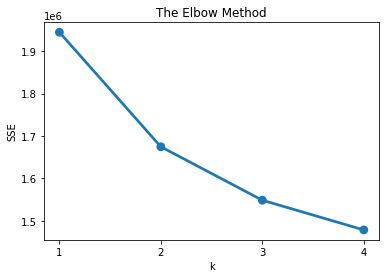

In [13]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 5):

    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(PCDF)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.plot()

In [14]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(PCDF)
cluster_labels = kmeans.labels_

In [15]:
PCDF_K2 = PCDF.assign(Cluster = cluster_labels)
PCDF_K2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,Cluster
0,-1.953397,1.590653,3.598276,-2.067164,1.477430,-0.842513,1.011409,-1.491531,-0.209148,-0.113227,-0.323498,-0.171255,-1.018437,0.485527,0.075374,-0.162122,-0.242232,0.035814,-0.009275,-0.382860,1.566942,-0.155126,0.517748,0.095088,0.605572,-0.588552,-0.912151,0.488638,2.029465,3.220651,1.183629,-1.754941,-0.187258,-0.774392,-0.004906,-0.338646,0
1,-3.584533,2.185618,1.163305,-0.724255,-1.345003,-2.085663,1.330386,-4.127008,-0.477236,-0.001488,-0.085170,0.134220,-1.602470,0.621359,-0.365154,-0.461116,0.092324,1.158721,-0.908574,-0.257976,0.692224,-0.108012,-0.377931,-0.176271,-0.237173,0.896092,-0.411859,-0.943632,0.855282,0.069286,-0.170873,0.356642,0.164901,0.102596,0.101601,-0.086099,0
2,-3.303052,0.465076,0.820368,-0.508379,-1.374596,-2.533094,2.437033,-4.998205,-0.288010,0.078200,0.034707,0.098271,-1.396139,0.885312,-0.920608,-0.291528,-0.853441,0.838793,-0.060684,0.119319,-0.402290,-0.039253,-0.484987,-0.096601,-0.756747,0.801959,0.198122,-1.036921,0.107717,-0.127715,0.122423,1.313359,0.219940,0.282927,-0.114491,-0.127250,0
3,11.701337,3.825383,3.897736,2.083586,-0.719027,-0.485121,-1.560345,-3.494323,-4.866235,-0.490186,-0.656335,-0.069937,-3.264975,-2.497415,-3.935052,2.359363,0.480174,-1.706729,-0.387376,-4.633703,0.023944,0.904322,0.406664,0.190419,0.990079,2.503912,3.386092,1.206553,0.051398,-0.029049,0.504556,-0.812881,0.587701,1.278580,-1.807465,0.941527,1
4,-2.886781,3.225610,3.709021,0.687745,-1.099007,-1.444459,-0.241606,-2.728716,0.072135,0.019397,0.277375,0.726467,0.454172,-0.328206,0.506916,-0.119933,0.441649,0.280163,-0.320169,-0.188491,0.407969,0.224530,0.411235,0.071082,0.437360,-0.784318,0.466604,-1.021161,-0.458594,-0.284364,0.034879,-0.476079,0.340103,-0.714437,0.583932,-0.034803,0


In [16]:
PCDF_K2.groupby('Cluster').mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.087988,-0.030517,0.005810,0.003932,0.000908,-0.005078,0.011234,0.009501,0.008267,0.004807,-0.001280,-0.015384,0.002007,0.004652,0.016803,0.022038,0.014199,0.004591,0.010540,0.013924,0.007042,0.007241,-0.000079,0.000968,0.003401,0.012390,0.028902,0.007168,0.004039,0.005379,-0.007163,-0.003094,0.002623,-0.000064,-0.003130,-0.001525
1,4.850689,0.136059,-0.025903,-0.017530,-0.004049,0.022639,-0.050086,-0.042359,-0.036859,-0.021431,0.005706,0.068589,-0.008949,-0.020741,-0.074916,-0.098252,-0.063305,-0.020469,-0.046994,-0.062080,-0.031394,-0.032284,0.000351,-0.004314,-0.015165,-0.055238,-0.128855,-0.031958,-0.018006,-0.023983,0.031936,0.013793,-0.011695,0.000284,0.013954,0.006798


In [ ]:
data.head()
    
for idx, row in PCDF_K2.iterrows():
    if PCDF_K2.loc[idx, 'Cluster'] == 0:
        PCDF_K2.loc[idx, 'Cluster'] = 1
    else:
        PCDF_K2.loc[idx, 'Cluster'] = 0

In [ ]:
ytrain_binary.head(20)

In [ ]:
ypredicted.head(20)

In [18]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

ypredicted = PCDF_K2['Cluster']
print(confusion_matrix(ytrain_binary, ypredicted))
print(precision_recall_fscore_support(ytrain_binary, ypredicted, average='macro'))

from sklearn.metrics import classification_report
print(classification_report(ytrain_binary, ypredicted))

[[29407  6929]
 [12288  2423]]
(0.4821886844063231, 0.4870071279153463, 0.47755705316467384, None)
              precision    recall  f1-score   support

           0       0.71      0.81      0.75     36336
           1       0.26      0.16      0.20     14711

    accuracy                           0.62     51047
   macro avg       0.48      0.49      0.48     51047
weighted avg       0.58      0.62      0.59     51047



In [ ]:
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d') 
# ax.set_xlabel('PC1', fontsize = 15)
# ax.set_ylabel('PC2', fontsize = 15)
# ax.set_zlabel('PC3', fontsize = 15)
# ax.set_title('3 component PCA', fontsize = 20)
# targets = [0, 1]
# colors = ['r', 'g']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['Churn'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
#                , finalDf.loc[indicesToKeep, 'pc2']
#                , finalDf.loc[indicesToKeep, 'pc3']
#                , c = color
#                , s = 10)
# ax.legend(targets)
# ax.grid()
# ax.view_init(120, 60)
